In [1]:
# https://deeplearningcourses.com/c/unsupervised-deep-learning-in-python
# https://www.udemy.com/unsupervised-deep-learning-in-python
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

In [2]:
def relu(x):
    return x * (x > 0)


def error_rate(p, t):
    return np.mean(p != t)


def getKaggleMNIST():
    # MNIST data:
    # column 0 is labels
    # column 1-785 is data, with values 0 .. 255
    # total size of CSV: (42000, 1, 28, 28)
    train = pd.read_csv('us_data/train.csv').as_matrix().astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest


def init_weights(shape):
    return np.random.randn(*shape) / np.sqrt(sum(shape))

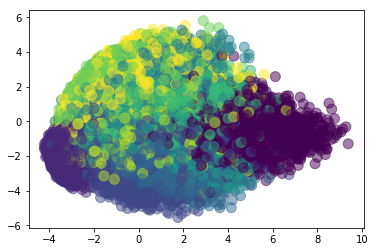

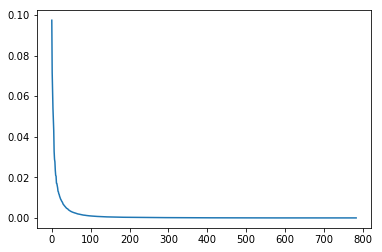

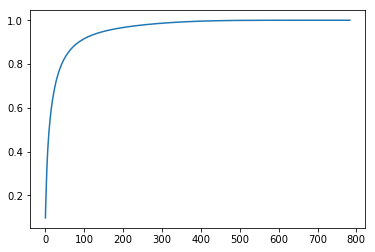

In [3]:
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

pca = PCA()
reduced = pca.fit_transform(Xtrain)
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.5)
plt.show()

plt.plot(pca.explained_variance_ratio_)
plt.show()

# cumulative variance
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.plot(cumulative)
plt.show()